<a href="https://colab.research.google.com/github/AuraFrizzati/GoogleCloud-Terraform-EDX-course/blob/main/03_Writing_Infrastructure_Code_for_Google_Cloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **[03] Writing Infrastructure Code for Google Cloud**

**Objectives**

In this module, you will explore more about resources, variables, and output resources.

We will begin by exploring how to create infrastructure components using **resources** and then explore how Terraform handles **dependencies** within resources.

While we have been covering resource creation by using hard-code resource arguments, we will explore how you can **parameterize** a given **configuration** using **variables**. We will explore the syntax to declare, define and use them within your configuration.

We will then discuss how you can **export resource attributes outside the resource declaration** using **output values**.

We will then wrap up the module by discovering how you can **simplify code authoring** using **Terraform registry**, and **Cloud Foundation Toolkit**.

Upon completing this module you will be able to

- **Declare the resources** within Terraform.
- Explain **implicit** and **explicit resource dependencies**.
- Use **variables** and **output values** within the root configuration.
- Explain **Terraform Registry** and **Cloud Foundation Toolkit**.



This module focusses on the first phase of the Terraform workflow, the **Author phase**. During this phase you write your Terraform code in the HCL language.

## **3.1: Introduction to Resources**

**What are Resources?**

- Resources are **infrastructure elements**, such as: compute engine instances, VPC (Virtual Private Cloud), Cloud Storage bucket and Firewall rules. These elements can be **configured** using **Terraform code**.
- Terraform uses the **underlying APIs** of each Google Cloud service to deploy your resources

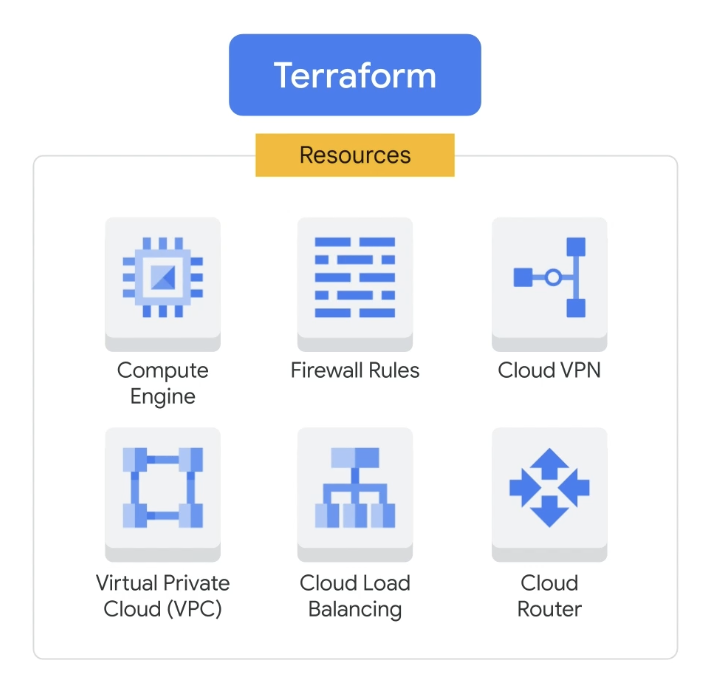

**Syntax to declare a resource**

- Resources are defined within a `.tf` file
- It is recommended that you place similar types of resources in a directory and define the resources in the `main.tf` file

```
-- network/
  -- main.tf
  -- outputs.tf
  -- variables.tf
```

```
resource "resource_type" "resource_name" {
  # Resource arguments
}
```

- The **resource block** is used to declare a **single infrastructure object**
- The `resource_type` identifies the **type of resource** being created and **depends on the provider being declared** within a Terraform module
- A **provider** is a **plugin that provides a collection of resource types**. Generally a provider is a **cloud infrastructure platform** (e.g. Google Cloud)
- **Resource arguments** are expressions to declare resources' **attributes**. Not all resource arguments must be defined, although some are instead mandatory for resource creation. Attributes can be used to define any **advanced feature** associated with a resource

**A configuration file can include multiple resources**

- You can include **multiple resources** of the same or different types in the **same Terraform configuration file**.

- These resources can even span across **multiple providers**


```
resource "google_compute_network" "vpc_network" {
  name                    = vpc-network" # Required argument
  project                 = "<Project_ID>"
  auto_create_subnetworks = false
  mtu                     = 1460
}

resource "google_compute_subnetwork" "subnetwork-ipv6" {
name                      = "ipv6-test-subnetwork" # Required argument
ip_cidr_range             = "10.0.0.0/22" # Required argument
network                   = google_compute_network.vpc_network.id # Required argument
region                    = "us-west2"

}
```

- A **resource** is identified by the `resource` keyword, followed by the **resource type**
- The resource arguments depend on the resource type.

- To **access a resource's attribute from another resource block**, use **`<resource_type>.<resource_name>.<attribute>`**
  - In the above example, the `vpc_network.id` is a computed resource attribute of a `google_compute_network` block. The `id` attribute is generated when the `vpc_network` resource is created.
  - This method can only be used when **resources** are **defined within the same root configuration**.